In [102]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항 feature를 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [103]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [104]:
# 분류하는 형태 7가지
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [105]:
# 컬럼에 문자타입이 존재하는지 확인
# 머신러닝을 돌릴 수가 없음
# 문자 - 삭제
# 문자 - 코드 변경
# - 1. 문자를 아스키 코드로 변경(숫자) - 표준점수
# - 2. 원핫인코딩 방식

In [106]:
# str문자 타입이 존재하면
# - 제거를 나중에, df에 합칠지
# - 원핫인코딩으로 만들어서 머신러닝에 적용할지

In [107]:
# pandas 원핫인코딩 함수
df_dumm = pd.get_dummies(df['Species'])
df_dumm.iloc[35]

Bream        False
Parkki       False
Perch        False
Pike         False
Roach         True
Smelt        False
Whitefish    False
Name: 35, dtype: bool

In [108]:
# 데이터 종류 수 파악 후 부족한 데이터를 보충해주는 작업도 필요함
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [109]:
# 데이터 전처리1 -  data, result 분리
# 데이터 전처리2 - train, test set 분리
# 데이터 전처리3 - 표준화 작업
# 데이터 학습시키기
# 데이터 정답률(정확도)

# 데이터 전처리
# 다시 학습시키기

판다스 전처리 - data, result 분리 작업

In [110]:
# 데이터 전처리1 -  data, result 분리
d_target = df['Species'].to_numpy()
d_input = df.iloc[:,1:].to_numpy()
# d_input

In [111]:
# 데이터 전처리2 - train, test set 분리
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    d_input,d_target,random_state=42
)

In [112]:
# 데이터 전처리3 - 표준화 작업
# 타입이 numpy
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [113]:
# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [114]:
# 데이터 정답률(정확도)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled, test_target))

# 과소적합
# 로지스틱 회귀 -> 반복횟수늘리기, 규제 조정

0.8067226890756303
0.85


In [115]:
### 반복횟수를 늘려서 정확도를 높이는 작업
### C 규제
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [116]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [117]:
# 로지스틱 회귀 분류 모델 완성

In [118]:
# 경사하강법 - 머신러닝 튜닝
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)  # 실제에서는 random_state를 빼야함

sc.fit(train_scaled,train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [119]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [120]:
# 아직 정확도가 높지 않다
# 재훈련
# 데이터 일부를 가져와 훈련을 진행해서 target을 맞춤 -> 전체적인 target을 알지 못함
# 전체적인 target이 무엇인지 알려줘야 한다. -> classes 추가
classes = np.unique(train_target)
print(classes)

sc.partial_fit(train_scaled,train_target,classes=classes)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
0.8151260504201681
0.85


In [121]:
# partial_fit 반복을 시키면 효율이 좋아짐><
train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1 = sc.score(train_scaled, train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled, test_target)
    test_score.append(sc2)

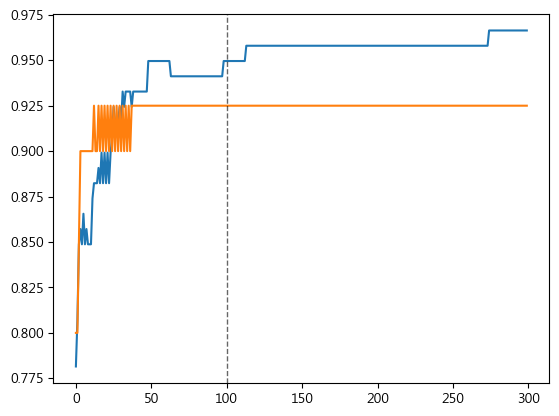

In [128]:
# 반복적인 학습 -> 예측 정확도 그래프 그려보기(300번 반복)
plt.plot(train_score)
plt.plot(test_score)
plt.axvline(x= 100, ls='--',color='black',linewidth=1, alpha=0.6)
plt.show()

In [123]:
# tol=None, max_iter 반복횟수 무조건 돌려준다
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
